## El Niño

In [1]:
import earthkit.data
import earthkit.plots

In [2]:
YEARS = {
    1993: "Normal conditions",
    1997: "El Niño",
    1998: "La Niña",
}

DOMAIN = [100, 300, -20, 20]

In [3]:
data = earthkit.data.from_source(
    "cds", "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "sea_surface_temperature",
        "year": list(YEARS),
        "month": "12",
        "time": "00:00",
        "area": [20, 100, -20, -60],
        "grid": [0.25, 0.25],
    },
)

2025-02-18 14:26:43,256 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-18 14:26:43,256 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-18 14:26:43,396 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-18 14:26:43,397 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-18 14:26:43,591 INFO Request ID is fd9de673-20f8-4eec-baff-eef95783b675
2025-02-18 14:26:43,674 IN

cbc1fb7e60838d9b40e7e6629b427145.grib:   0%|          | 0.00/702k [00:00<?, ?B/s]

In [4]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sst,surface,0,19931201,0,0,an,0,regular_ll
1,ecmf,sst,surface,0,19971201,0,0,an,0,regular_ll
2,ecmf,sst,surface,0,19981201,0,0,an,0,regular_ll


In [5]:
STYLE = earthkit.plots.styles.Style(
    colors="Spectral_r",
    levels=range(15, 33),
    units="celsius",
    ticks=range(15, 33),
)

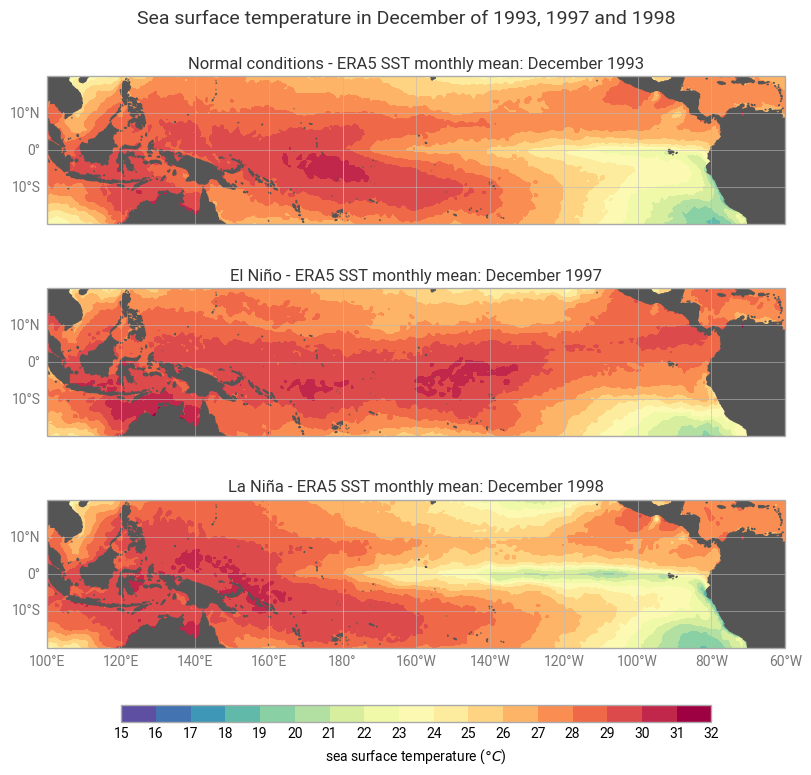

In [6]:
figure = earthkit.plots.Figure(rows=3, columns=1, size=(8, 7.5))

for i, year in enumerate(YEARS):
    subplot = figure.add_map(domain=DOMAIN)
    subplot.contourf(data[i], style=STYLE)
    subplot.title(f"{YEARS[year]} - ERA5 {{short_name!u}} monthly mean: {{time:%B %Y}}")

figure.land(color="#555", zorder=2)
figure.gridlines(xstep=20, ystep=10, sharex=True)

figure.title("{variable_name} in {time:%B} of {time:%Y}", fontsize=14)

figure.legend(label="{variable_name!l} ({units})")

figure.show()